# Задание 1

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel('1-43a9e0c3-25b8-4b18-af1b-258eee3ed597.xls')

In [ ]:
df.head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN


In [ ]:
#сортировка датафрейма по дате регистрации и исключение повторяющихся клиентов


df_sorted_regtime = df.sort_values('reg_dttm')
print(len(df_sorted_regtime))
df_sorted_regtime = df_sorted_regtime.drop_duplicates(subset = ['client_id'], keep = 'first')
print(len(df_sorted_regtime))
df_sorted_regtime

2377
2099


,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0
2376,835717,1986-08-14,2019-04-05 13:13:41,NaN,NaT,NaN


In [ ]:
#создание lдатафрейма с датами

control_dates = pd.DatetimeIndex(['2019-01-05', '2019-02-05', '2019-03-05', '2019-04-05'])
control_dates

DatetimeIndex(['2019-01-05', '2019-02-05', '2019-03-05', '2019-04-05'], dtype='datetime64[ns]', freq=None)

In [ ]:
#подсчет среднего значения для дат

data1 =pd.DataFrame(columns= control_dates.astype(object))
for k in control_dates:
  data1[k] = pd.DataFrame(abs(pd.DatetimeIndex(df_sorted_regtime['birth_dt'][df_sorted_regtime['reg_dttm'] < k]).year- 2019)).mean()

data1 = data1.astype(np.float64)
data1

,2019-01-05 00:00:00,2019-02-05 00:00:00,2019-03-05 00:00:00,2019-04-05 00:00:00
birth_dt,31.888889,30.695195,30.222444,29.45702


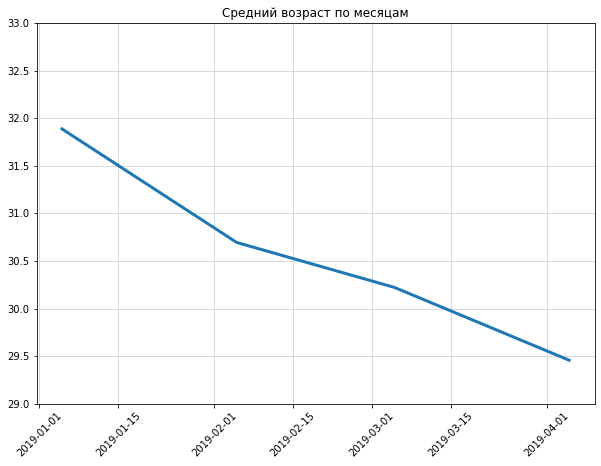

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Cредний возраст по месяцам')
ax.plot(data1.columns, data1.values.T, linewidth = 3)
ax.grid(color = '#ced1d6')
plt.xticks(rotation = 45)
fig.set_size_inches(10,7)
plt.ylim([29, 33])
plt.show()

In [ ]:
#подсчет клиентов по возрастным группам для каждой из дат


ages = pd.DataFrame(abs(pd.DatetimeIndex(df['birth_dt']).year - 2019))
cat_cols = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
ages_at_control = np.zeros((len(control_dates), 6), dtype= np.int64)
clients_at_control = [i for i in range(len(control_dates))]
for k in range(len(control_dates)):
  clients_at_control[k] = df_sorted_regtime['birth_dt'][df_sorted_regtime['reg_dttm'] < control_dates[k]]


for i in range(len(clients_at_control)):
  for k in range(len(clients_at_control[i])):
    if ages['birth_dt'][k] // 10 == 1:
      ages_at_control[i][0] += 1
    elif ages['birth_dt'][k] // 10 >= 6:
      ages_at_control[i][5] += 1
    else:
      for j in range(1, len(cat_cols) - 1):
        if int(cat_cols[j][0]) == ages['birth_dt'][k] // 10:
          ages_at_control[i][(ages['birth_dt'][k] // 10) - 1] += 1
ages_at_control = pd.DataFrame(ages_at_control)
ages_at_control

,0,1,2,3,4,5
0,0,5,3,1,0,0
1,52,306,167,91,39,11
2,136,708,364,183,94,21
3,207,1036,479,226,120,26


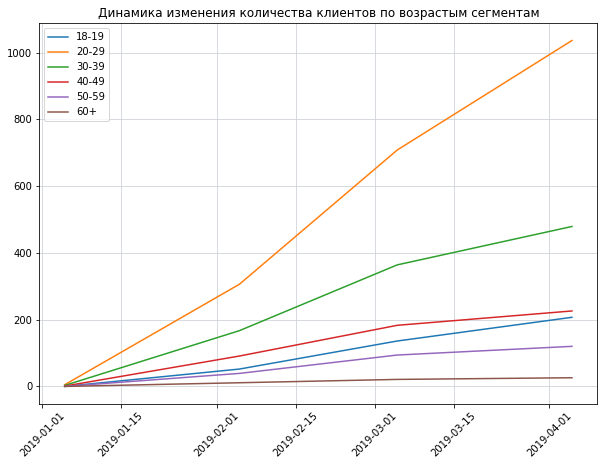

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Динамика изменения количества клиентов по возрастым сегментам')
ax.plot(control_dates, ages_at_control[0], label = cat_cols[0])
ax.plot(control_dates, ages_at_control[1],  label = cat_cols[1])
ax.plot(control_dates, ages_at_control[2],  label = cat_cols[2])
ax.plot(control_dates, ages_at_control[3],  label = cat_cols[3])
ax.plot(control_dates, ages_at_control[4],  label = cat_cols[4])
ax.plot(control_dates, ages_at_control[5],  label = cat_cols[5])
ax.legend()
ax.grid(color = '#ced1d6')
fig.set_size_inches(10,7)
plt.xticks(rotation = 45)
plt.show()

# Задание 2

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel('1-43a9e0c3-25b8-4b18-af1b-258eee3ed597.xls')

In [ ]:
df.head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN


In [ ]:
#исключение повторяющихся клиентов без возможного исключения информации о покупке
#если имееются данные хотя бы в одном из purchase-столбцов, считаем покупку совершённой


print(len(df))
purchase = df.dropna(subset=['purchase_id', 'purchase_amt', 'purchase_dt'], how = 'all')
df = pd.concat([purchase, df])
df = df.drop_duplicates(subset = 'client_id', keep = 'first')
print(len(df))


2377
2099


In [ ]:
#массив с данными о том, совершал ли клиент покупки

utilized = pd.DataFrame(df['purchase_id'].isnull() + df['purchase_amt'].isnull() + df['purchase_dt'].isnull()).to_numpy()

utilized = np.concatenate(utilized)
utilized

array([False, False, False, ...,  True,  True,  True])

In [ ]:
#подсчет  общего количества клиентов; клиентов, совершивших покупки; и конверсии по возрастным группам

ages = pd.DataFrame(abs(pd.DatetimeIndex(df['birth_dt']).year - 2019))
#cat_cols = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
cat_cols = ages.drop_duplicates(subset =['birth_dt']).sort_values('birth_dt')
age_cat = pd.DataFrame(np.zeros((len(cat_cols)), dtype= np.int64), index = cat_cols['birth_dt']).T
age_cat_utilized =  pd.DataFrame(np.zeros((len(cat_cols)), dtype= np.int64), index = cat_cols['birth_dt']).T
ages = np.concatenate(ages.to_numpy())
i = 0
for k in ages:
    age_cat[k] += 1
    if utilized[i]:
      age_cat_utilized[k] += 1
    i += 1
  
age_cat = np.concatenate(age_cat.to_numpy())
age_cat_utilized = np.concatenate(age_cat_utilized.to_numpy())
data1 = np.ndarray((3, len(age_cat)))
data1[0] = age_cat
data1[1] = age_cat_utilized
data1[2] = np.around(age_cat_utilized/age_cat, 6)
age_ut = pd.DataFrame(data1.T, columns=['total', 'utilized', 'conv'], index= cat_cols['birth_dt'])
age_ut

,total,utilized,conv
birth_dt,,,
18,28.0,14.0,0.500000
19,189.0,82.0,0.433862
20,144.0,73.0,0.506944
21,160.0,82.0,0.512500
22,148.0,85.0,0.574324
23,126.0,68.0,0.539683
24,110.0,68.0,0.618182
25,83.0,44.0,0.530120
26,85.0,49.0,0.576471


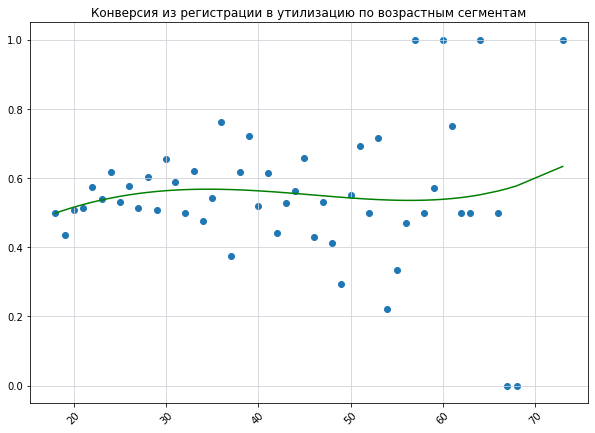

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(cat_cols)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, age_ut['conv'])


x = cat_cols
y = age_ut['conv']

fig, ax = plt.subplots()
ax.set_title('Конверсия из регистрации в утилизацию по возрастным сегментам')
ax.scatter(x, y)
ax.grid(color = '#ced1d6')
fig.set_size_inches(10,7)
plt.xticks(rotation = 45)
plt.plot(cat_cols, lin_reg.predict(poly_reg.fit_transform(cat_cols)), color = 'green')
plt.show()

# Задание 3

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel('1-43a9e0c3-25b8-4b18-af1b-258eee3ed597.xls')

In [ ]:
df.head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN


In [ ]:
# исключение клиентов, не совершавших покупки или для покупок которых отсутствуют необходимые данные

df1 = df.dropna(subset = ['reg_dttm', 'purchase_dt','purchase_amt'])
df1 = df1.sort_values('purchase_dt')

#исключение повторных покупок из числа оставшихся, т.к. нас интересуют только первые покупки
df1.drop_duplicates(keep = 'first', subset = ['client_id'])
df1 = df1[['reg_dttm', 'purchase_dt','purchase_amt']]
len(df1)

1239

In [ ]:
#подсчет срока утилизации и сортировка по этому параметру

df1['util_period'] = abs(df1['reg_dttm'] - df1['purchase_dt'])
df1 = df1.sort_values('util_period')
df1['util_period']

570     0 days 03:46:27
325     0 days 04:40:33
1100    0 days 04:46:41
1111    0 days 06:52:38
879     0 days 07:04:42
             ...       
116    80 days 02:50:01
38     81 days 12:38:23
64     85 days 04:50:02
39     87 days 12:38:23
42     87 days 12:48:23
Name: util_period, Length: 1239, dtype: timedelta64[ns]

In [ ]:
#создание массива с суммами средней покупки по дням с момента регистрации
d = df1['util_period'].astype('timedelta64[D]')
days = np.array([i for i in range(int(d.max()))])
days_mean = np.zeros((days.shape), dtype= np.float64)
for k in days:
    days_mean[k] += df1['purchase_amt'][df1['util_period'].astype('timedelta64[D]') == k].mean()
days_mean = np.nan_to_num(days_mean)

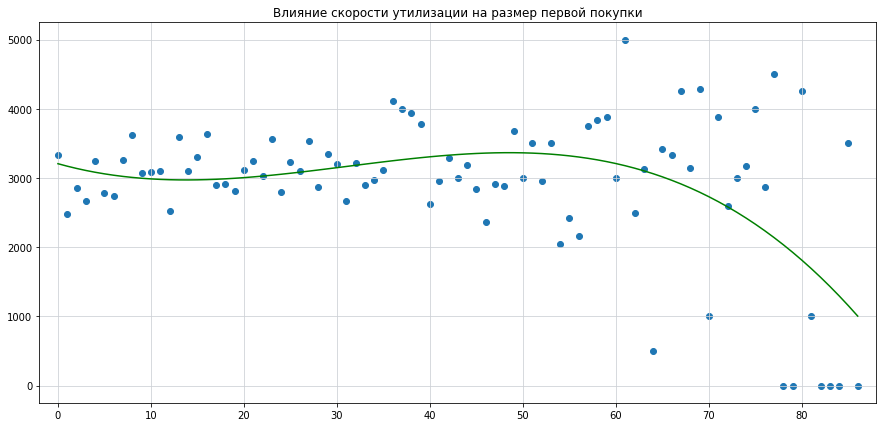

In [ ]:
#отобразим данные о средней покупке по дням на графике
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(days.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, days_mean)

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
ax.set_title('Влияние скорости утилизации на размер первой покупки')
ax.scatter(days, days_mean)
ax.grid(color = '#ced1d6')
plt.xlim([days.min() - 2, days.max() + 2])
plt.plot(days, lin_reg.predict(poly_reg.fit_transform(days.reshape(-1, 1))), color = 'green')
plt.show()

In [ ]:
#создание массива с суммами средней покупки в первый для каждого из часов
first_day = df1[df1['util_period'].astype('timedelta64[D]') == 0]
hours = np.array([i for i in range(24)])
hours_mean =  np.zeros((hours.shape), dtype= np.float64)
for k in hours:
    hours_mean[k] += first_day['purchase_amt'][first_day['util_period'].astype('timedelta64[h]') == k].mean()
hours_mean = np.nan_to_num(hours_mean)

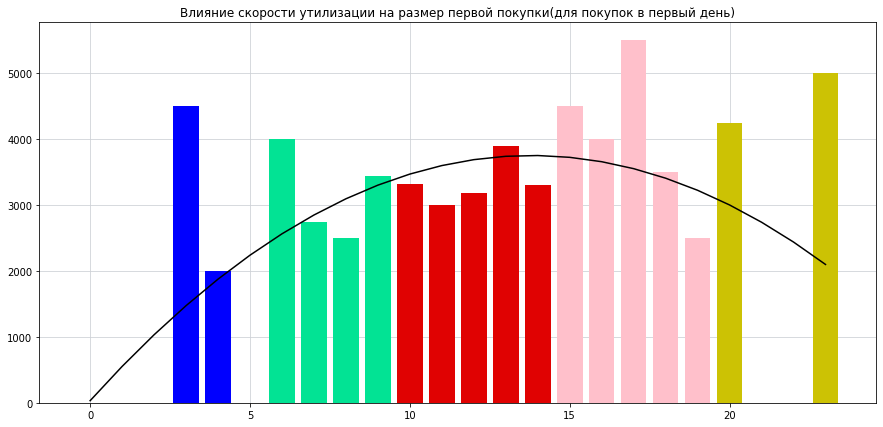

In [ ]:
#отобразим данные о средней покупке в первый день по каждому из часов на графике

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(hours.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, hours_mean)

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
ax.set_title('Влияние скорости утилизации на размер первой покупки(для покупок в первый день)')
ax.bar(hours[:5], hours_mean[:5], color = 'blue')
ax.bar(hours[5:10], hours_mean[5:10], color = '#02e394')
ax.bar(hours[10:15], hours_mean[10:15], color = '#e00202')
ax.bar(hours[15:20], hours_mean[15:20], color = 'pink')
ax.bar(hours[20:], hours_mean[20:], color = '#ccc204')
ax.grid(color = '#ced1d6')
ax.set_axisbelow(True)
plt.plot(hours, lin_reg.predict(poly_reg.fit_transform(hours.reshape(-1, 1))), color = 'black')
plt.show()